 # Exponentially Weighted Moving Average or, <br> Seimple exponential smoothing

importing packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import numpy as np

importing data

In [2]:
df = pd.read_csv('zipnames.csv')
df = pd.DataFrame(df)

In [3]:
#df.drop('Unnamed: 0', axis = 1,  inplace = True)
df = df[['Date', 'average_listing_price', 'zip_name']]
df['Date'] = pd.to_datetime(df['Date'], format = '%Y-%m-%d')

finding the top 5 states that experienced the most growth of the dataset we have. 

In [4]:
percent1 = []
for i in df.zip_name.unique():
    temp1 = df[df.zip_name == i]
    temp1.groupby(['Date'])['average_listing_price'].mean()
    pricechange1 = (temp1['average_listing_price'].iloc[-1]) - (temp1['average_listing_price'].iloc[0])
    percentchangezip = ((pricechange1)) / (temp1['average_listing_price'].iloc[0]) * 100
    percent1.append([i,percentchangezip])

In [5]:
col = ['State', 'percentincrease']
top_5 = pd.DataFrame(percent1, columns = col)

In [6]:
top_5 = top_5.sort_values(by = 'percentincrease', ascending = 0).head(5)

'location' is a list of the top 5 cities with the most grows. its put into a list in order to itterate though. <br>
in this case the top 5 are <br>
fort lauderdale, fl <br>
columbus, oh <br>
las vegas, nv <br>
indianapolis, in <br>
new orleans, la <br>

In [7]:
location = list(top_5.State)

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


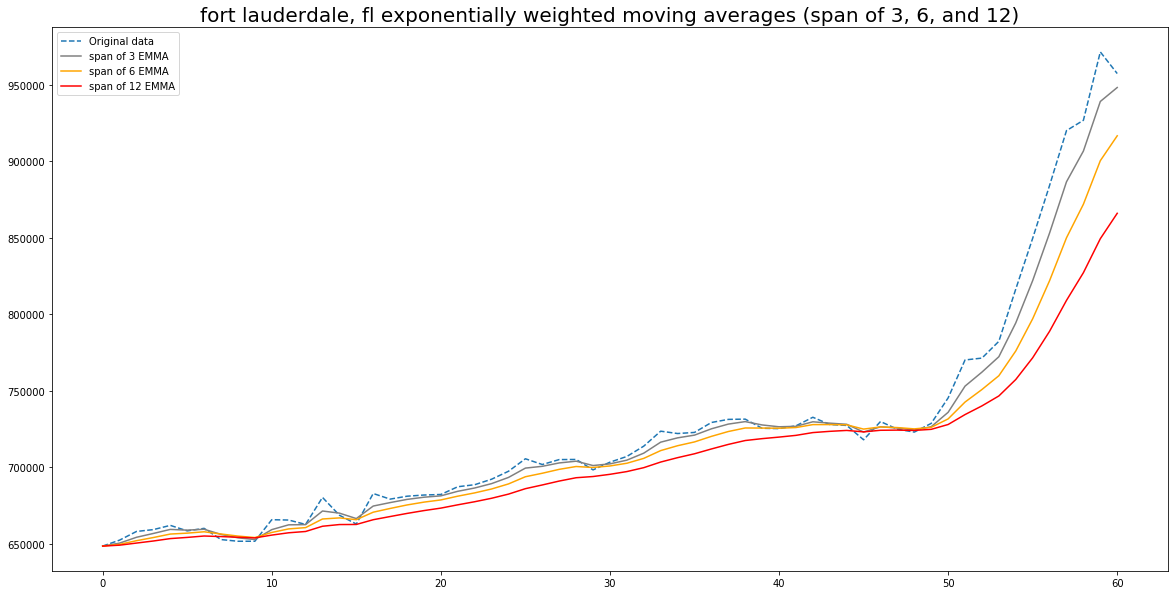

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


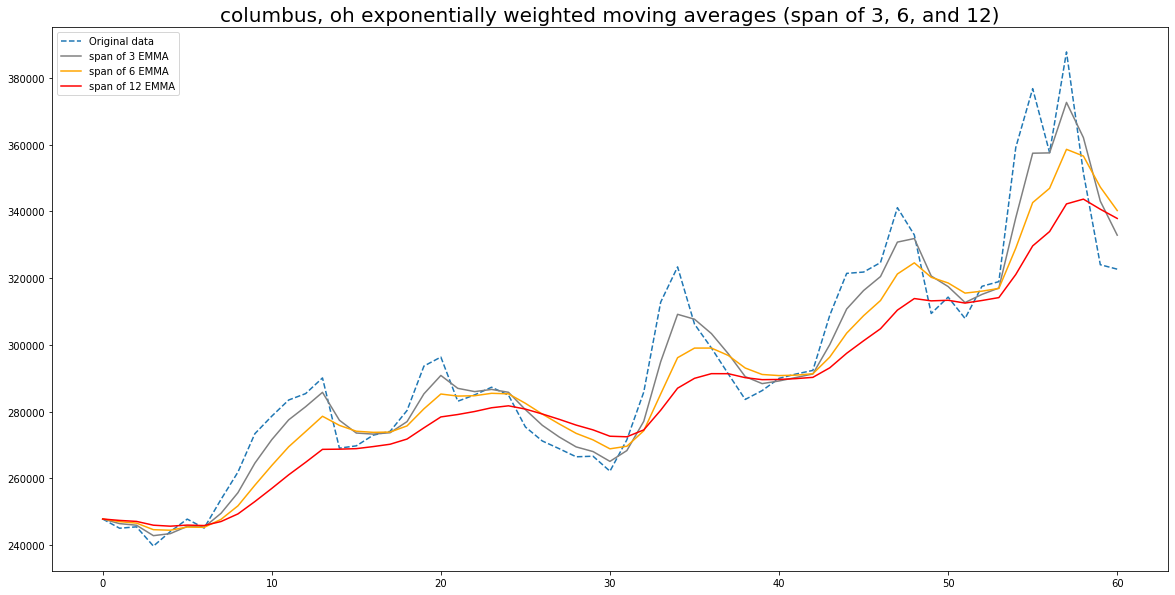

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


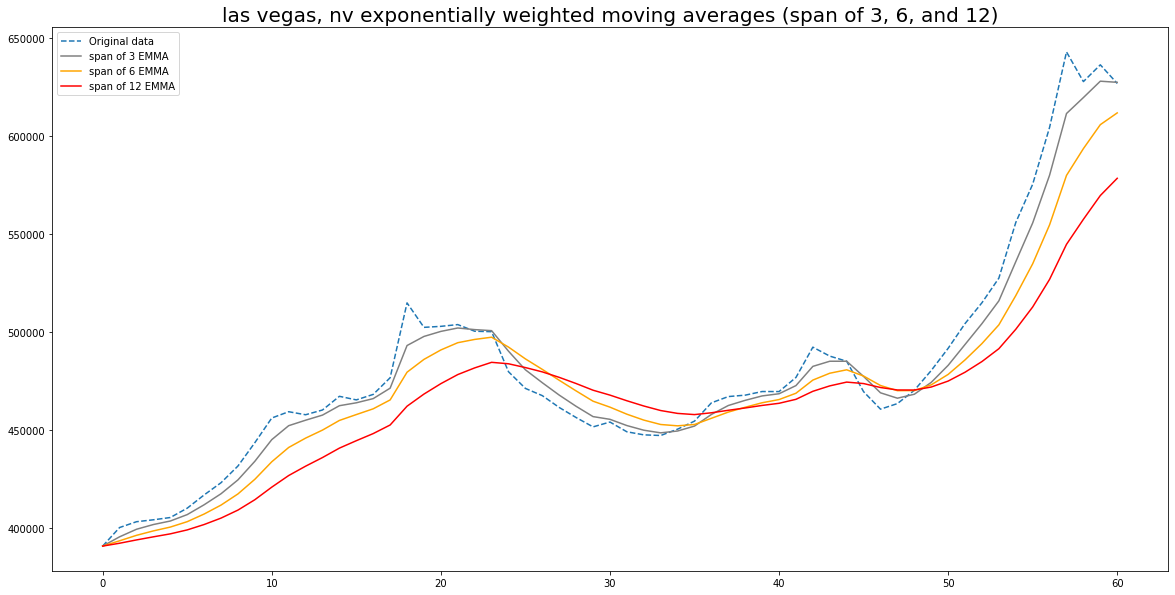

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


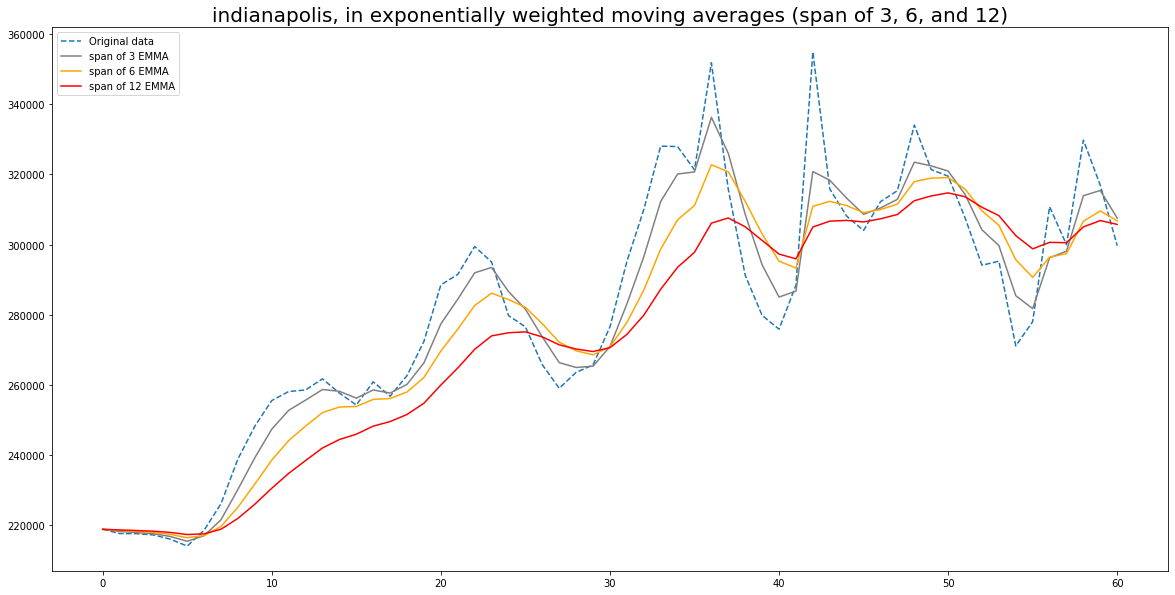

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


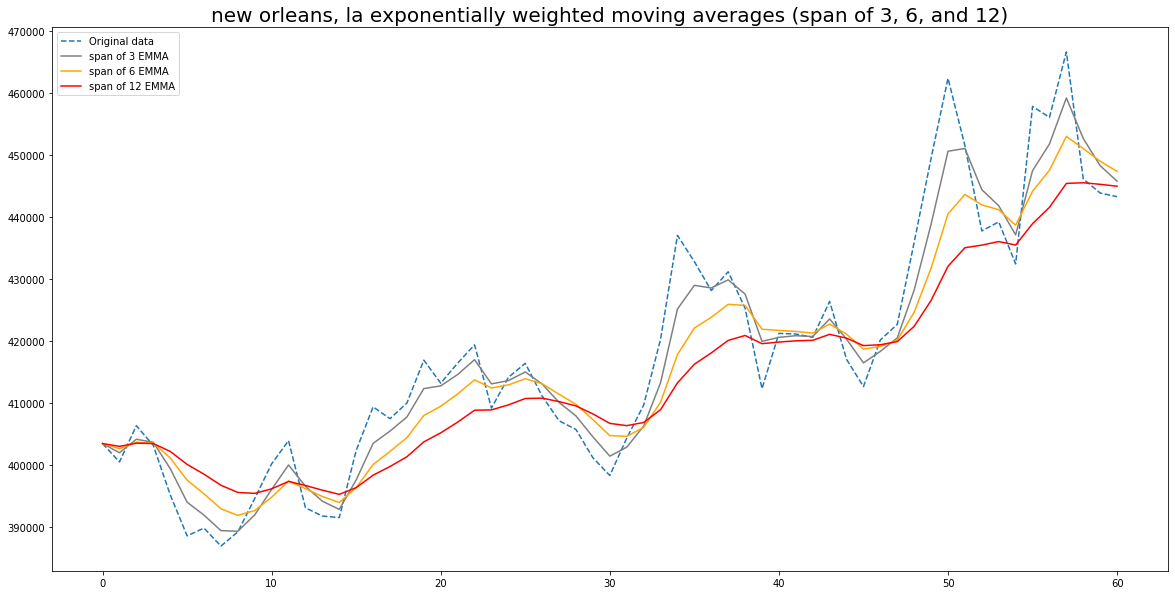

In [8]:
#this loop itterates though the 5 citys
for i in range(len(location)):
    testdf = df[df['zip_name'] == location[i]] #isolates the citys data
    testdf.drop('zip_name', axis = 1, inplace = True) #drops city name since its a new data set that contains only one city
    testdf.sort_values(by = 'Date', inplace = True) #droping date
    testdf = testdf.groupby(['Date'], as_index=False)['average_listing_price'].mean() #grouping by the average of the city
    # Calculate the estimated moving averages with a span of 3, 6, and 12 data points
    #this is to see which span will perform the best
    testdf['span of 3 EMMA'] = testdf.average_listing_price.ewm(span=3, adjust=False).mean()
    testdf['span of 6 EMMA'] = testdf.average_listing_price.ewm(span=6, adjust=False).mean()
    testdf['span of 12 EMMA'] = testdf.average_listing_price.ewm(span=12, adjust=False).mean()

    # Plotting each EMMA per city 
    plt.figure(figsize=(20,10))
    plt.title( str(location[i]) + ' exponentially weighted moving averages (span of 3, 6, and 12)', size=20)
    plt.plot(testdf.average_listing_price,'--', label='Original data')
    plt.plot(testdf['span of 3 EMMA'], color='gray', label='span of 3 EMMA')
    plt.plot(testdf['span of 6 EMMA'], color='orange', label='span of 6 EMMA')
    plt.plot(testdf['span of 12 EMMA'], color='red', label='span of 12 EMMA')
    plt.legend(loc = 'upper left');
    plt.show()

A span of 3 data points apeared to closly follow the actual data

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


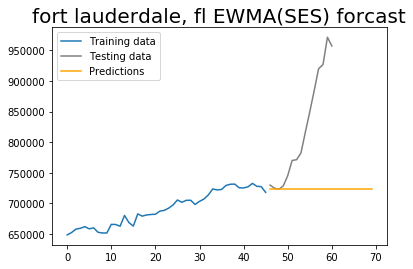

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


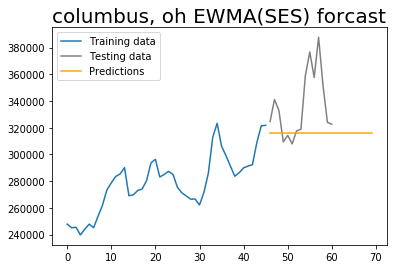

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


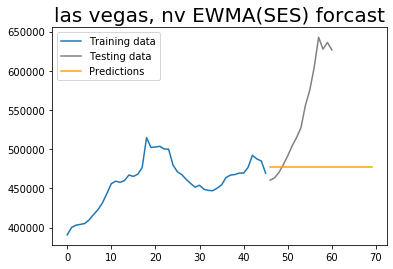

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


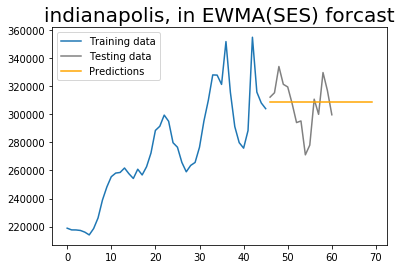

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


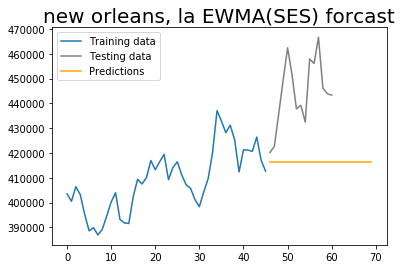

In [9]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Model parameters
span = 3
alpha = 2 / (span + 1)

for i in range(len(location)): #itterating though each of the 5 citys and making a prediction
    testdf = df[df['zip_name'] == location[i]]
    testdf.drop('zip_name', axis = 1, inplace = True)
    testdf.sort_values(by = 'Date', inplace = True)
    testdf = testdf.groupby(['Date'], as_index=False)['average_listing_price'].mean()
    # Train/test split
    df_train = testdf[:-15]
    df_test = testdf[-15:]

    # Train the model
    model = SimpleExpSmoothing(df_train.average_listing_price)
    results = model.fit(smoothing_level=alpha, optimized=False)
    predictions = results.forecast(steps=24)

    # Plot
    plt.title(str(location[i]) + ' EWMA(SES) forcast', size=20)
    plt.plot(df_train.average_listing_price, label='Training data')
    plt.plot(df_test.average_listing_price, color='gray', label='Testing data')
    plt.plot(predictions, color='orange', label='Predictions')
    plt.legend();
    plt.show()

as we can see from the graph(s), exponential smoothing did not do such a great job predicting the future real estate prices based on the validation data

# LSTM

In [10]:
df

,Date,average_listing_price,zip_name
0,2021-07-01,222849.9667,"indianapolis, in"
1,2021-07-01,463052.9505,"orlando, fl"
2,2021-07-01,851539.4189,"fort lauderdale, fl"
3,2021-07-01,525167.6452,"austin, tx"
4,2021-07-01,889984.5429,"san jose, ca"
...,...,...,...
102489,2016-07-01,274644.8800,"austin, tx"
102490,2016-07-01,105667.8819,"chicago, il"
102491,2016-07-01,451591.0714,"minneapolis, mn"
102492,2016-07-01,423535.8909,"portland, or"


Importing packages needed for LSTM

In [11]:
from pandas import Series
from pandas import concat
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from math import sqrt
from matplotlib import pyplot
import numpy

creating finctions needed for LSTM

In [12]:
# frame a sequence as a supervised learning problem
def timeseries_to_supervised(data, lag=1):
    df = pd.DataFrame(data)
    columns = [df.shift(i) for i in range(1, lag+1)]
    columns.append(df)
    df = concat(columns, axis=1)
    df.fillna(0, inplace=True)
    return df
 
# create a differenced series, essential to making the data stationary
def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return Series(diff)
 
# invert differenced value
def inverse_difference(history, yhat, interval=1):
    return yhat + history[-interval]
 
# scale train and test data to be within the values of [-1, 1]
def scale(train, test):
    # fit scaler
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train)
    # transform train
    train = train.reshape(train.shape[0], train.shape[1])
    train_scaled = scaler.transform(train)
    # transform test
    test = test.reshape(test.shape[0], test.shape[1])
    test_scaled = scaler.transform(test)
    return scaler, train_scaled, test_scaled
 
#inverse scaling for a forecasted value
def invert_scale(scaler, X, value):
    new_row = [x for x in X] + [value]
    array = numpy.array(new_row)
    array = array.reshape(1, len(array))
    inverted = scaler.inverse_transform(array)
    return inverted[0, -1]
 
#fit an LSTM network to our training data
def fit_lstm(train, batch_size, nb_epoch, neurons):
    X, y = train[:, 0:-1], train[:, -1]
    X = X.reshape(X.shape[0], 1, X.shape[1])
    model = Sequential()
    model.add(LSTM(neurons, batch_input_shape=(batch_size, X.shape[1], X.shape[2]), stateful=True))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    for i in range(nb_epoch):
        model.fit(X, y, epochs=1, batch_size=batch_size, verbose=0, shuffle=False)
        model.reset_states()
    return model
 
#this function makes a one-step forecast
def forecast_lstm(model, batch_size, X):
    X = X.reshape(1, 1, len(X))
    yhat = model.predict(X, batch_size=batch_size)
    return yhat[0,0]

modeling

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


---------------------------------------------
fort lauderdale, fl
---------------------------------------------
Test RMSE: 25791.965


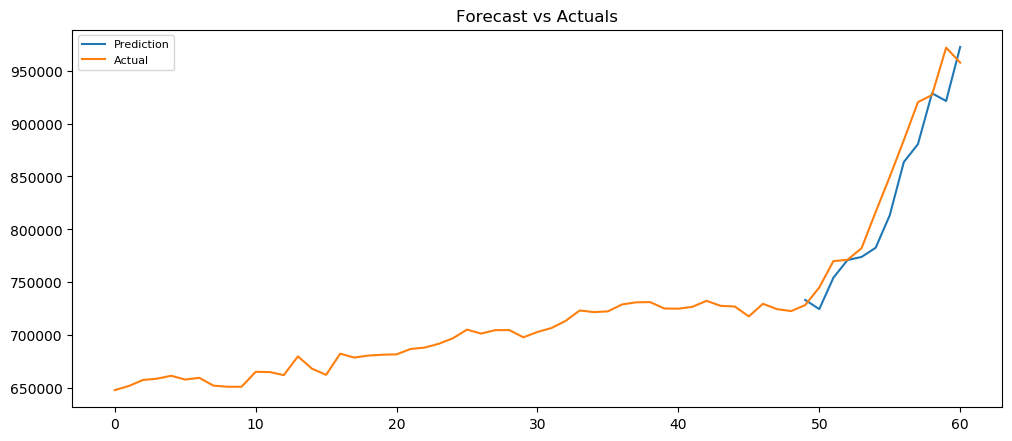

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


---------------------------------------------
columbus, oh
---------------------------------------------
Test RMSE: 22586.665


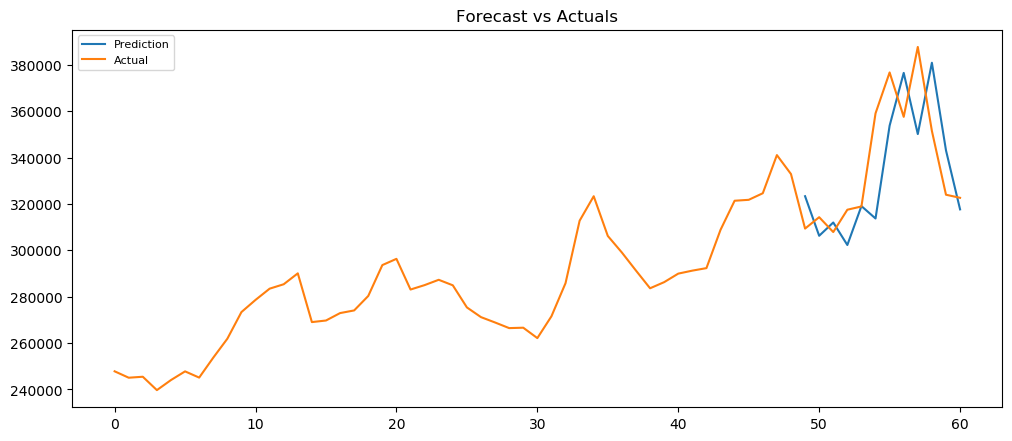

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


---------------------------------------------
las vegas, nv
---------------------------------------------
Test RMSE: 21887.912


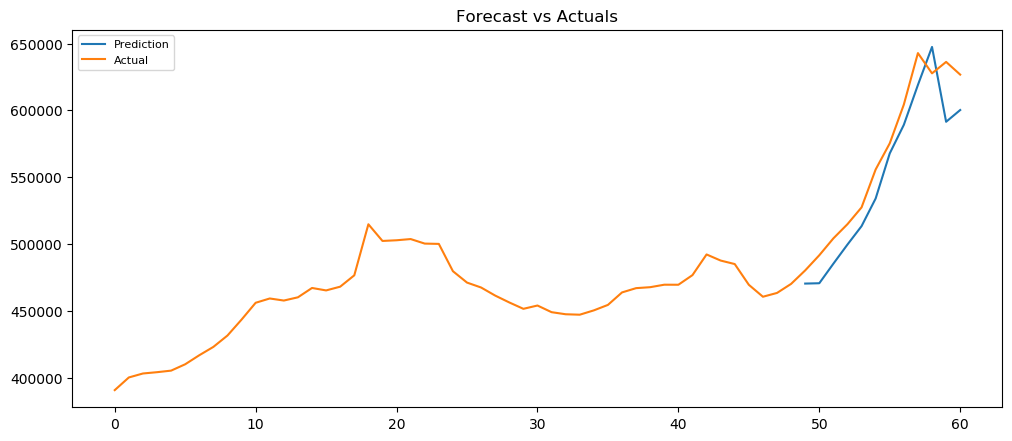

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


---------------------------------------------
indianapolis, in
---------------------------------------------
Test RMSE: 18731.084


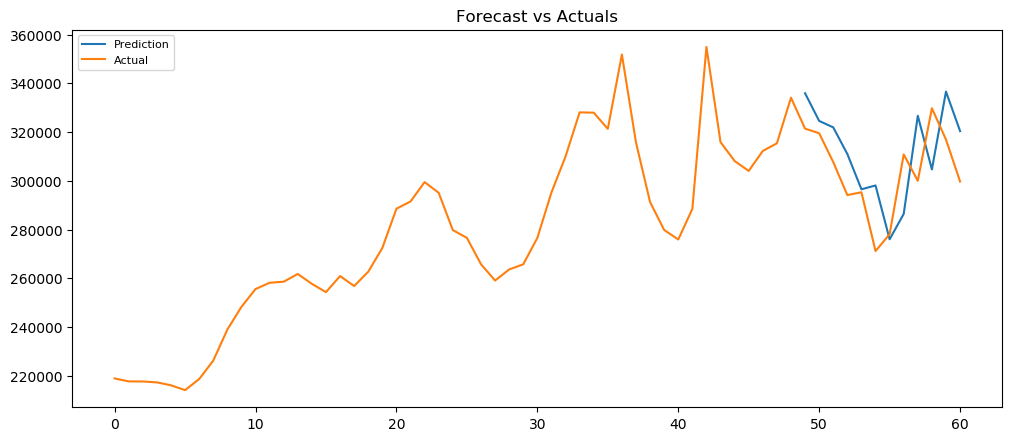

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


---------------------------------------------
new orleans, la
---------------------------------------------
Test RMSE: 12617.701


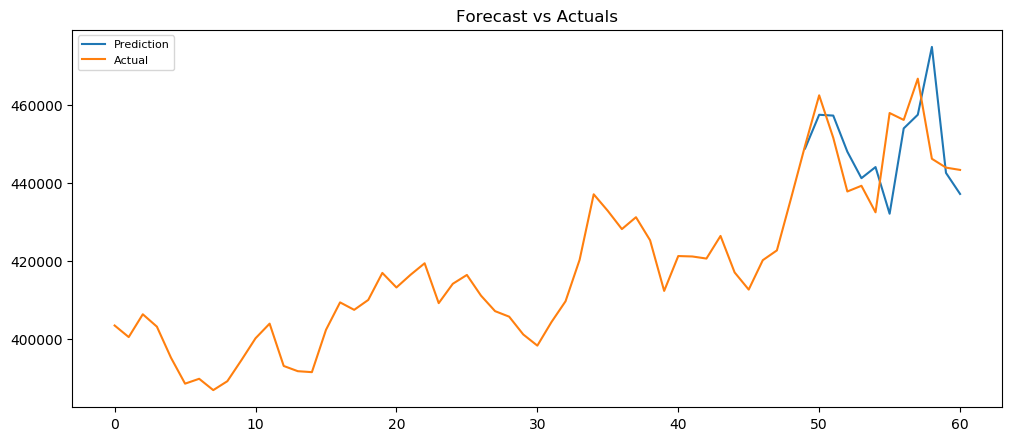

In [14]:
for ii in range(len(location)): #loop that itterates through citys
    testdf = df[df['zip_name'] == location[ii]]
    testdf.drop('zip_name', axis = 1, inplace = True)
    testdf.sort_values(by = 'Date', inplace = True)
    testdf = testdf.groupby(['Date'], as_index=False)['average_listing_price'].mean() 
    testdf.drop('Date', axis = 1, inplace = True)
    # transforming data to be stationary
    raw_values = testdf.values
    diff_values = difference(raw_values, 1)

    # transform data to be supervised learning
    supervised = timeseries_to_supervised(diff_values, 1)
    supervised_values = supervised.values

    # split data into train and test-sets
    train, test = supervised_values[0:-12], supervised_values[-12:]

    # transform the scale of the data
    scaler, train_scaled, test_scaled = scale(train, test)

    # fit the model
    lstm_model = fit_lstm(train_scaled, 1, 3000, 4)
    # forecast the entire training dataset to build up state for forecasting
    train_reshaped = train_scaled[:, 0].reshape(len(train_scaled), 1, 1)
    lstm_model.predict(train_reshaped, batch_size=1)

    # walk-forward validation on the test data
    predictions = list()
    for i in range(len(test_scaled)):
        # make one-step forecast
        X, y = train_scaled[i, 0:-1], train_scaled[i, -1]
        yhat = forecast_lstm(lstm_model, 1, X)
        # invert scaling
        yhat = invert_scale(scaler, X, yhat)
        # invert differencing
        yhat = inverse_difference(raw_values, yhat, len(test_scaled)+1-i)
        # store forecast
        predictions.append(yhat)
        expected = raw_values[len(train) + i + 1]
    
    rmse = sqrt(mean_squared_error(raw_values[-12:], predictions))
        
    print('---------------------------------------------')
    print(location[ii])
    print('---------------------------------------------')
    print('Test RMSE: %.3f' % rmse)
    # line plot of observed vs predicted
#    pyplot.plot(raw_values[-12:])
    plt.figure(figsize=(12,5), dpi=100)
    plt.plot(range(49, len(predictions) + 49), predictions, label = 'Prediction')

#    pyplot.plot(predictions)
    plt.plot(testdf, label = 'Actual')
    plt.title('Forecast vs Actuals')
    plt.legend(loc='upper left', fontsize=8)
    plt.show()
